# Name: Justin Jeremiah Rangad
# Roll: EE21B062

# Function optimization

A common occurrence in several domains of engineering is that we need to optimize a certain function of some variables.  For example: $f(x) = x^2$.  Here we have a function of one variable ($x$) and we want to find the *minimum* value of that function over all values of $x$.  Of course, in this case we know that our objective is to minimize rather than maximize -- this may not always be the same option.

This of course is precisely what Calculus is so good at: by setting the derivative of the function to 0, we can solve the equation to find the value of $x$ that gives a possible optimum value.  In the present case, $f'(x) = 2x \Rightarrow x = 0$ will give us the *optimum* (in this case the minimum).

But what if we wanted to do this the *hard* way - actually do it numerically.  In this case it may be the painful way, but in general it might be useful.  So let us first get the big picture - what does our function actually look like?

In [16]:
%pip install ffmpeg

  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=b93ec39f19fe8d565e3b368831b8cbe49ed1aec5bd6dbbec3f4bcc2ad1d41cd2
  Stored in directory: /home/btech/ee21b062/.cache/pip/wheels/1d/57/24/4eff6a03a9ea0e647568e8a5a0546cdf957e3cf005372c0245
Successfully built ffmpeg
Note: you may need to restart the kernel to use updated packages.


In [18]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML, Image
import math
from numpy import cos, sin, pi, exp 

ModuleNotFoundError: No module named 'ffmpeg'

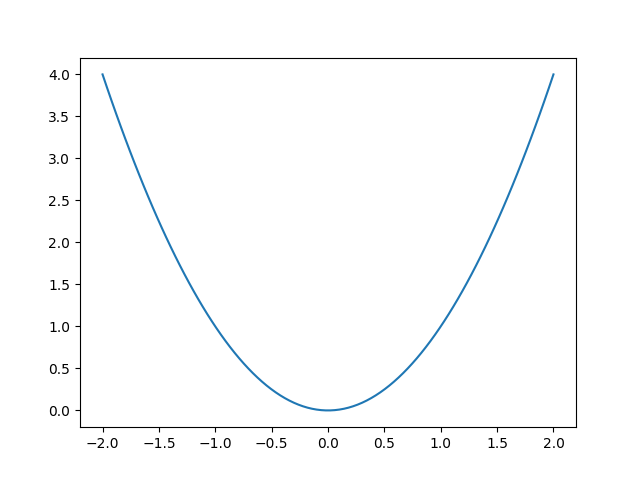

In [2]:

# Create the axis and function
xbase = np.linspace(-2, 2, 100)
def yfunc(x):
    return x ** 2
ybase = yfunc(xbase)
plt.plot(xbase, ybase)

## Iterative improvement

If we don't know how to optimize, one possible approach is to throw darts - make a random guess, and see how good the present value is.  If the new value is better than the old one, retain it, else make a new guess.  Keep doing this for a large number of guesses.

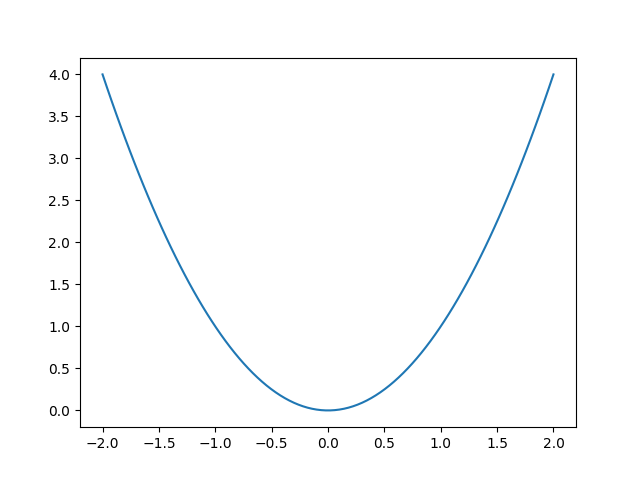

In [3]:
# Set up some large value for the best cost found so far
bestcost = 100000
# Generate several values within a search 'space' and check whether the new value is better
# than the best seen so far.
bestx = -100
rangemin, rangemax = -2, 2 
fig, ax = plt.subplots()
ax.plot(xbase, ybase)
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)
def onestep(frame):
    global bestcost, bestx
    # Generate a random value \in -2, +2
    x = np.random.random_sample() * 4 - 2
    y = yfunc(x)
    if y < bestcost:
        # print(f"Improved from {bestcost} at {bestx} to {y} at {x}")
        bestcost = y
        bestx = x
        lngood.set_data(x, y)
    else:
        # print(f"New cost {y} worse than best so far: {bestcost}")
        pass
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)
    return 

ani= FuncAnimation(fig, onestep, frames=range(10), interval=1000, repeat=False)
plt.show()

## Systematic improvement

Instead of randomly guessing values, is there a better way to proceed?  What if we know what kind of change in $x$ would result in a good change in $y$?  Can we *guide* the optimization process so it reaches the minimum in fewer steps?

One way to do this is to recognize that at any point, the derivative of y can be used to guide the direction of improvement.  Let us say we are trying to minimize the function $f(x)$.

$$
f(x + dx) \approx f(x) + f'(x) dx
$$

If $f'(x)>0$, the curve is sloping upwards as we increase $x$.  So we should go in the opposite direction, that is, decrease $x$.  Alternatively, if $f'(x)<0$, the function will decrease if we increase $x$, so we should increase $x$.  In other words, either way we should go in the opposite direction to $f'(x)$.

### How much?

So we know the direction, but how much should we change $x$?  If we change by a constant amount, then the change in $f(x)$ will be proportional to the value of $f'$ at that point.  But intuitively, it would seem that if there is a rapid change in the function, then it makes sense to take a larger step in the hope of reaching the optimum faster.  

At the same time, too large a step could make us overshoot, and then we would have to come back.  

Finally, a fixed step size would eventually get us to the right place, but it could take a long time if we are far away from the optimum, even though the gradient indicates that there is likely to be a large change in the function.

This is captured using a parameter called the *learning rate*.  By modifying the learning rate, we can control how quickly we move towards the optimum.

/usr/local/lib/python3.9/dist-packages/matplotlib/animation.py:880: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


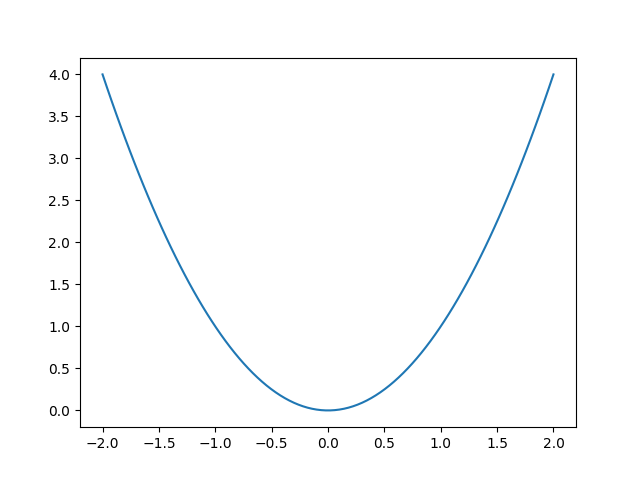

In [4]:
# Set up some large value for the best cost found so far
bestcost = 100000
# Generate several values within a search 'space' and check whether the new value is better
# than the best seen so far.
bestx = 2
rangemin, rangemax = -5, 5 
fig, ax = plt.subplots()
ax.plot(xbase, ybase)
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)
# Learning rate 
lr = 0.1

def yprimefunc(x):
    return 2 * x

def onestepderiv(frame):
    global bestcost, bestx, lr
    x = bestx - yprimefunc(bestx) * lr 
    bestx = x
    y = yfunc(x)
    lngood.set_data(x, y)
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)
    return lngood,

ani= FuncAnimation(fig, onestepderiv, frames=range(10), interval=1000, repeat=False)
plt.show()


## Multiple optima

Consider the function $f(x) = x^4 - 2 x^3 + 3 x^2 + 5x +10$

In [5]:
def cfunc(x):
    return x**4 - 3*x**2 + 1*x 

def cfuncd(x):
    return 4*x**3 -6*x + 1

xbase = np.linspace(-2, 2, 100)
ybase = cfunc(xbase)

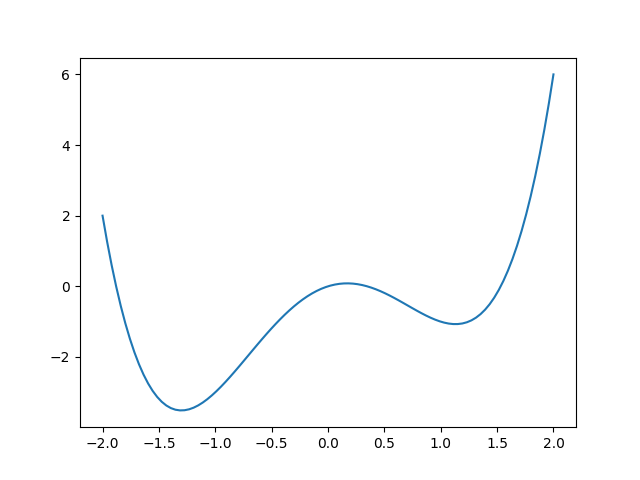

In [6]:
# Set up some large value for the best cost found so far
bestcost = 100000
# Generate several values within a search 'space' and check whether the new value is better
# than the best seen so far.
bestx = 2
rangemin, rangemax = -5, 5 
fig, ax = plt.subplots()
ax.plot(xbase, ybase)
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)

# Learning rate 
lr = 0.1

def onestepderiv(frame):
    global bestcost, bestx, lr
    x = bestx - cfuncd(bestx) * lr 
    bestx = x
    y = cfunc(x)
    lngood.set_data(x, y)
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)
    return lngood,

ani= FuncAnimation(fig, onestepderiv, frames=range(10), interval=1000, repeat=False)
plt.show()

# Assignment

- Implement a function that takes the following inputs, and finds the minimum using gradient descent
  - Function definition (one variable)
  - Derivative (also a function definition)
  - Starting point
  - Learning rate
- Repeat the above, but with 2 or more variables (you will be tested with different functions with different numbers of variables depending on what you have implemented)
- Use 3-D plots to show the path taken by a 2 variable optimization

# Gradient Descent For 1d functions:

From the above discussion of gradient descent. I have implemented my interpretation of the algorithm. To avoid global variables, I decided to use object oriented programming as I helps us reduce the use of global variables by using object attributes. Object attributes are chracteristics of a particular object of a class. By doing this I can continuously update my best approximation of the minima without ever needing to use global variables.

In [7]:
def cfunce(x):         #This is a test function
    return x**4 - 3*x**2 + 1*x 

def cfuncde(x):        #Derivative of the function
    return 4*x**3 -6*x + 1

x1base = np.linspace(-2, 2, 100) #Here -2,2 is the range and 100 is the total number of points between
y1base = cfunce(x1base)


## The 1D gradient descent function:
In the snippet below I implemented the grad class, In that class I set up the attributes that an object that class should have in the init_1 function, Every object must have a characteristic: function(func), derivative(ddx) , starting point(sp) and learning rate(lr). Using these parameters we can fine tune our gradient descent.

The lnall plot contain all the previous best points whereas the lngood plot includes only the current best point. The grad1D function of the class is used to implement gradient descent by using the above explained formula.

This function is repeatedly called by funcanimate and the animation is made. We can play around with the learning rate and starting point to get a more optimal solution.

The HTML function was used so that we can play and pause the animation.


In [8]:
fig, ax = plt.subplots()
ax.plot(x1base, y1base)
xall1, yall1 = [], []
lnall1,  = ax.plot([], [], 'ro')#Plots all previous minima
lngood1, = ax.plot([], [], 'go', markersize=10)#plots current minima
def init_1():
    lnall1.set_data([], [])
    lngood1.set_data([],[])
    return lnall1, lngood1,
class grad:
    def __init__(self,func,ddx,sp,lr):#Properties of the objects
        self.func=func
        self.ddx=ddx
        self.lr=lr
        self.bestx=sp
        self.besty=100000
        xall1.append(sp)
        yall1.append(func(sp))
    def grad1D(self,frames):# The gradient descent function
        x = self.bestx - self.ddx(self.bestx) * self.lr 
        self.bestx= x
        y = self.func(x)
        self.besty=y
        lngood1.set_data(x, y)
        xall1.append(x)
        yall1.append(y)
        lnall1.set_data(xall1, yall1)
#This is where we can enter our functions and learning rates:grad(func,grad,start,lr)
g1=grad(cfunce,cfuncde,0,0.09)
ani1= FuncAnimation(fig,g1.grad1D, frames=range(10),interval=120, repeat_delay=60, blit=True,init_func=init_1)
plt.close()
HTML(ani1.to_jshtml())

## The 2D gradient Descent Function:
The below function implements gradient descent for functions with two variables. The process is almost the same as the 1D case besides the fact that we now have to work with partial derivatives and hence we will need to call the gradient descent function twice once for each variable.

This is implemented for the below example:

In [9]:
def dfunc(a,b): #our two variable function
    return a**2 + b**2

def dfuncd(a,b):
    dira=2*a# the partial derivative for the first variable
    dirb=2*b# The partial derivative for the second variable
    return [dira,dirb]

abase = np.linspace(-10, 10, 100)
bbase = np.linspace(-10, 10, 100)
Abase, Bbase = np.meshgrid(abase, bbase)
cbase = dfunc(Abase,Bbase)

## 3D plots:
We use matplotlibs ability to plot 3D functions and pair that with Funcanimate to display a 3d animation for the above examples grad descent.

In [10]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
# The plot of the 3d Surface.
ax.plot_surface(Abase, Bbase, cbase, cmap ='viridis',rstride = 5, cstride = 5, alpha=0.5)
aall, ball, call = [], [], []
lnall,  = ax.plot([], [], [], 'r-', label = 'Gradient descent', lw = 3)#our previous best points
point, = ax.plot([], [], [], 'g*')# our current best point
ax.view_init(45, -60)# we can adjust view angle from here
def init_2():# initializing function to clear all our data
    lnall.set_data([], [])
    lnall.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    return lnall, point, 

class NDgrad:
    def __init__(self,func,ddx,sp,lr):# our object properties.
        self.func=func
        self.ddx=ddx
        self.lr=lr
        self.dep=sp
        self.ind=100000
    def gradND(self,frames):
            d=self.ddx(*self.dep)
            #We have to use the gradient descent function twice as there are two variables
            self.dep[0]= self.dep[0] - d[0]* self.lr    
            self.dep[1]= self.dep[1] - d[1]* self.lr
            self.ind=self.func(self.dep[0],self.dep[1])
            x=self.dep[0]
            y=self.dep[1]
            z=self.ind
            #Adding the new points to the respective arrays
            point.set_data([x],[y])
            point.set_3d_properties([z])
            aall.append(x)
            ball.append(y)
            call.append(z)
            lnall.set_data(aall, ball)
            lnall.set_3d_properties(call)
            return lnall,point,
#This is where we can enter our functions and learning rates:grad(func,grad,start(x,y),lr)        
g2=NDgrad(dfunc,dfuncd,[-10,0],0.1)
ani= FuncAnimation(fig,g2.gradND, frames=range(20),interval=120, repeat_delay=60, blit=True,init_func=init_2)
plt.close()
HTML(ani.to_jshtml())

/usr/local/lib/python3.9/dist-packages/matplotlib/animation.py:880: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


## A general N Dimension Gradient Descent:
To implement a general N Dim gradient descent we can extrapolate what we have learnt for 1 and 2 dimensions and use N dimensional partial derivatives to find the gradient descent of any differentiable function.

In [11]:
class Ngrad:# Our N dimensional Gradient Descent function.
    def __init__(self,func,ddx,sp,lr):# object attributes
        self.func=func
        self.ddx=ddx
        self.lr=lr
        self.dep=sp
        self.ind=100000
        self.count=0
    def gradND(self):# The Grad function
        while self.ind>1e-128 and self.count<1000:#Our tolerance and max iterations
            grad=self.ddx(*self.dep)
            for i in range(len(self.dep)):# We perform gradient descent for each variable
                self.dep[i]= self.dep[i] - grad[i]* self.lr
            self.ind=self.func(*self.dep)
            self.count+=1
    def grad1D(self):# The gradient descent function
        while self.ind>1e-128 and self.count<1000:
            grad=self.ddx(self.dep)
            self.dep= self.dep - grad* self.lr
            self.ind=self.func(self.dep)
            self.count+=1
g1=Ngrad(cfunce,cfuncde,0,0.09)
g1.grad1D()
g2=Ngrad(dfunc,dfuncd,[-10,0],0.1)
g2.gradND()
print(f"The point of minima for the 1D example:{g1.dep} the minima:{g1.ind}")
print(f"The point of minima for the 2D example:{g2.dep} the minima:{g2.ind}")

The point of minima for the 1D example:-0.09 the minima:-0.11423438999999999
The point of minima for the 2D example:[-9.405486655686716e-65, 0.0] the minima:8.846317923030089e-129


# 1D problems:
My solutions to the posted 1d Gradient descent problems:



## Problem 1 - 1-D simple polynomial
Range of search [5,5]


In [12]:
def f1(x):# function definition
    return x ** 2 + 3 * x +8
def f1dir(x):# Gradient definition
    return 2*x +3
x1base = np.linspace(-5, 5, 100)
y1base = f1(x1base)

RuntimeError: Requested MovieWriter (ffmpeg) not available

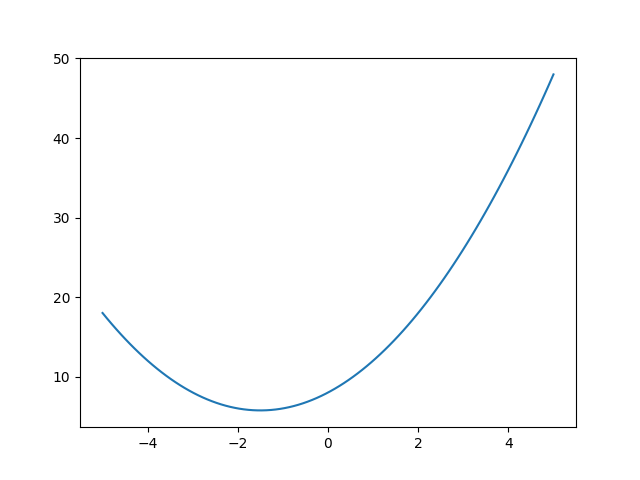

In [17]:
fig, ax = plt.subplots()
ax.plot(x1base, y1base)
xall1, yall1 = [], []
lnall1,  = ax.plot([], [], 'ro')#Plots all previous minima
lngood1, = ax.plot([], [], 'go', markersize=10)#plots current minima
g1=grad(f1,f1dir,3,0.1)
Writer = animation.writers['ffmpeg']
writer = Writer(fps=128, metadata=dict(artist='Justin'), bitrate=1800)
ani.save("f5.mp4", writer = writer)
ani1= FuncAnimation(fig,g1.grad1D, frames=range(10),interval=120, repeat_delay=60, blit=True,init_func=init_1)
plt.close()
HTML(ani1.to_jshtml())

In [ ]:
g1=Ngrad(f1,f1dir,3,0.1)
g1.grad1D()

In [ ]:
print(f"The minima point:{g1.dep} and the minima:{g1.ind}")

## The 1D trigonometric function:
My solution for problem 4:

In [ ]:
def f5(x):# The 4th problem
    return cos(x)**4 - sin(x)**3 - 4*sin(x)**2 + cos(x) + 1
def f5dir(x):# calculated derivative
       return -sin(x)*(1 + 4*cos(x)**3 + cos(x)*(8 + 3*sin(x)))
x1base = np.linspace(0, 2*np.pi, 100)
y1base = f5(x1base)

In [ ]:
fig, ax = plt.subplots()
ax.plot(x1base, y1base)
xall1, yall1 = [], []
lnall1,  = ax.plot([], [], 'ro')
lngood1, = ax.plot([], [], 'go', markersize=10)
g5=grad(f5,f5dir,3,0.05)
ani1= FuncAnimation(fig,g5.grad1D, frames=range(10),interval=120, repeat_delay=60, blit=True,init_func=init_1)
plt.close()
HTML(ani1.to_jshtml())

In [ ]:
g1=Ngrad(f5,f5dir,3,1)
g1.grad1D()

In [ ]:
print(f"The minima point:{g1.dep} and the minima:{g1.ind}")

## 2D functions Problems:
The two dimensional problems are solve by using the function in the second example:

### Problem 2: A 2D polynomial

In [ ]:
xlim3 =  [-10, 10]
ylim3 =  [-10, 10]
def f3(x, y):# Our function
    return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262

def df3_dx(x, y):# partial derivative
    return 4*x**3 - 48*x**2 + 192*x - 256

def df3_dy(x, y):# partial derivative
    return 2*y - 4
def f3grad(x,y):# combining both partial derivatives so that we can input it to our function
    xdir=4*x**3 - 48*x**2 + 192*x - 256
    ydir=2*y - 4
    return[xdir,ydir]
abase = np.linspace(-10, 10, 100)
bbase = np.linspace(-10, 10, 100)
Abase, Bbase = np.meshgrid(abase, bbase)
cbase = f3(Abase,Bbase)

In [ ]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
#Surface plot
ax.plot_surface(Abase, Bbase, cbase, cmap ='viridis',rstride = 5, cstride = 5, alpha=0.5)
#ax2.plot(theta_0,theta_1,J_history_reg, marker = '*', color = 'r', alpha = .4, label = 'Gradient descent')
aall, ball, call = [], [], []
lnall,  = ax.plot([], [], [], 'y-', label = 'Gradient descent', lw = 3)
point, = ax.plot([], [], [], 'g*')
ax.view_init(45, -60)
g2=NDgrad(f3,f3grad,[-10,0],0.0003)
ani= FuncAnimation(fig,g2.gradND, frames=range(20),interval=120, repeat_delay=60, blit=True,init_func=init_2)
plt.close()
HTML(ani.to_jshtml())

In [ ]:
g2=Ngrad(f3,f3grad,[0,0],0.0003)
g2.gradND()

In [ ]:
print(f"The minima point is:{g2.dep} and the minima is:{g2.ind}")

# Problem 3: A 2D complex function:

In [ ]:
xlim4 = [-pi, pi]
def f4(x,y):
    return exp(-(x - y)**2)*sin(y)

def f4_dx(x, y):
    return -2*exp(-(x - y)**2)*sin(y)*(x - y)

def f4_dy(x, y):
    return exp(-(x - y)**2)*cos(y) + 2*exp(-(x - y)**2)*sin(y)*(x - y)
def f4grad(x,y):
    dirx=f4_dx(x,y)
    diry=f4_dy(x,y)
    return[dirx,diry]
abase = np.linspace(-np.pi, np.pi, 100)
bbase = np.linspace(-np.pi, np.pi, 100)
Abase, Bbase = np.meshgrid(abase, bbase)# We need to mesh the two coordinates
cbase = f4(Abase,Bbase)

In [ ]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(Abase, Bbase, cbase, cmap ='viridis',rstride = 5, cstride = 5, alpha=0.5)
aall, ball, call = [], [], []
lnall,  = ax.plot([], [], [], 'r-', label = 'Gradient descent', lw = 3)
point, = ax.plot([], [], [], 'g*')
ax.view_init(45, -60)
g3=NDgrad(f4,f4grad,[0,0],0.55)
ani= FuncAnimation(fig,g3.gradND, frames=range(10),interval=120, repeat_delay=60, blit=True,init_func=init_2)
plt.close()
HTML(ani.to_jshtml())

In [ ]:
g2=Ngrad(f4,f4grad,[0,0],0.55)
g2.gradND()

In [ ]:
print(f"The minima point is:{g2.dep} and the minima is:{g2.ind}")

# Conclusion:

Gradient descent is far from perfect. Most times it gives the local minima rather than the global minima. It is a very useful tool thought and is used frequently in ML and data science. We don't even need the definition of the derivative to do gradient descent. It can also be implemented By looking at changes in output for small increments or decrements.